# Aula 6 - Aprendizagem não-supervisionada e K-MEANS

Por onde vamos passar? 

- 1) Aprendizagem não-supervisionada? Onde vive? O que come?;
- 2) Utilizando um exemplo com K-means;
- 3) Afinal, o que o K-means está fazendo?;
- 4) Agora que sabemos, vamos resolver um problema real.

![slide1](imagens/slide1.png)

![slide2](imagens/slide2.png)

![slide3](imagens/slide3.png)

In [1]:
# Fazemos a importação das bibliotecas que serão utilizadas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Vamos gerar um conjunto de dados mais simplificado para entender o funcionamento 

from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features = 2,centers = 4, cluster_std = 0.6, random_state = 0)

In [3]:
# usamos o y?
# NÃO VAMOS USAR O Y

In [4]:
# transforma em dataframe
df =pd.DataFrame(X, columns = ["x1", 'x2'])

In [5]:
# visualiza o dataframe
df.head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


<AxesSubplot:xlabel='x1', ylabel='x2'>

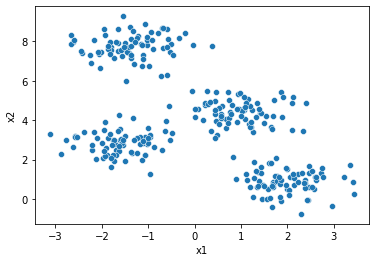

In [6]:
# plotar a figura para visualizar os agrupamentos
sns.scatterplot(x = "x1", y = "x2", data = df)

# Exercício: Aplicando o KMeans 

In [7]:
from sklearn.cluster import KMeans

In [8]:
# instancia o modelo
kmeans = KMeans(n_clusters = 4, max_iter = 300)

In [9]:
# treina o modelo
kmeans.fit(df)

KMeans(n_clusters=4)

In [10]:
# quais rótulos ele atribuiu em cada entrada?
kmeans.labels_

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3])

In [11]:
# Caso eu tenha algum dado novo, basta dar um predict 
kmeans.predict(df)

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0, 2, 0, 1, 2, 2, 1, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 0, 3, 3, 3,
       0, 1, 0, 3, 2, 3, 0, 3, 3, 0, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       3, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 3, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 0, 1, 2, 3, 0,
       1, 1, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 3, 3, 1, 1, 2,
       0, 1, 1, 3, 1, 3, 2, 0, 0, 2, 2, 0, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 1, 0, 2, 2, 3, 1,
       0, 3, 2, 0, 2, 1, 1, 3, 3, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 3, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 3])

In [12]:
# salvar os rótulos no dataframe
df["labels"] = kmeans.labels_

In [13]:
# visualizamos os rótulos
df.head()

,x1,x2,labels
0,0.836857,2.136359,1
1,-1.413658,7.409623,0
2,1.155213,5.099619,2
3,-1.018616,7.814915,0
4,1.271351,1.892542,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

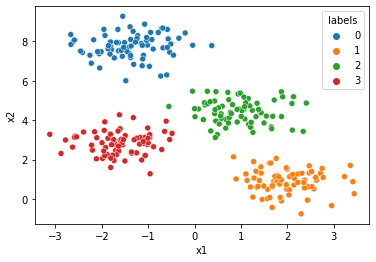

In [14]:
# agora podemos plotar com os rótulos
sns.scatterplot(x = "x1", y = "x2", data = df, hue = "labels", palette = "tab10")

In [15]:
# E depois de efetuar uma clusterização?
cluster_0 = df.query("labels == 0")
cluster_0

,x1,x2,labels
1,-1.413658,7.409623,0
3,-1.018616,7.814915,0
8,-0.204932,8.432097,0
9,-0.711100,8.660438,0
11,-2.670008,8.353891,0
...,...,...,...
288,-1.326888,8.515308,0
292,-1.120168,7.110316,0
293,-1.655071,8.614167,0
294,-1.275678,7.967765,0


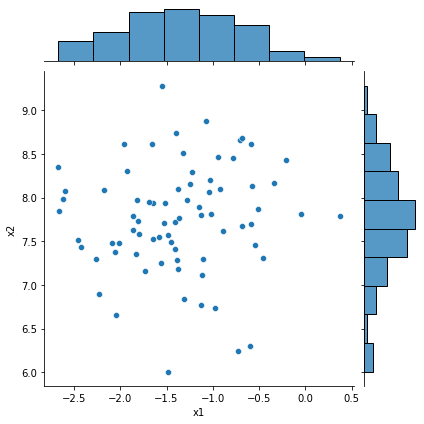

In [16]:
# plotamos um cluster para análise simples
sns.jointplot(x = "x1", y = "x2", data = cluster_0)

# Resumo de um projeto de cluserização:

- 1) Análise dos dados;
- 2) Separação em variaveis para clusterização e variaveis para caracterização;
- 3) Efetua a clusterização de fato;
- 4) Para cada grupo realiza-se um estudo sobre sua representação;
- 5) Validação dos agrupamentos.

# Mas como o K-Means funciona e como decidir a melhor quantidade de grupos?

![slide4](imagens/slide4.png)

![slide5](imagens/slide5.png)

# Agora, como decidir a melhor quantidade de clusters? 

- Método do Cotovelo e Inercia (WCSS: Within-Cluster-Sum-of-Squares);
- Método da Silhueta.

Mais métricas: https://medium.com/@gilneyjnr/qualidade-de-agrupamentos-ciência-de-dados-4b1176bef5e5

![slide6](imagens/slide6.png)

In [17]:
# fazemos o loop para resgatar as inercias (WCSS)
lista_inercias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[["x1", "x2"]])
    inercia = kmeans.inertia_
    lista_inercias.append(inercia)

C:\Users\joao\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [18]:
lista_inercias

[2812.1375953032334,
 1190.7823593643448,
 546.8911504626299,
 212.00599621083478,
 188.82985966318427,
 171.5057304966513,
 153.56181606926384,
 136.13761463934088,
 124.54889070841355]

Text(0, 0.5, 'Inercia (WCSS)')

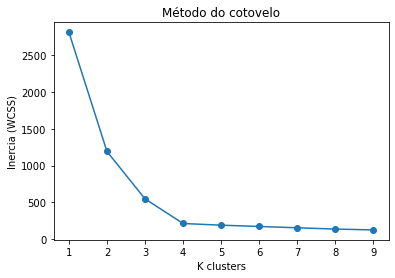

In [19]:
# plotamos o gráfico de cotovelo
plt.plot(range(1,10), lista_inercias, marker = "o")
plt.title("Método do cotovelo")
plt.xlabel("K clusters")
plt.ylabel("Inercia (WCSS)")

## Método da Silhueta

![silhueta](imagens/silhuetta.jpeg)

- Fonte: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

![slide7](imagens/slide7.png)

![slide7](imagens/slide8.png)

In [20]:
# importamos o silhueta
from sklearn.metrics import silhouette_score

In [21]:
# Fazemos o loop e salvamos os valores de silhueta
lista_silhuetas = []
# cuidado, aqui o range deve começar em 2, se não a distância "b" não existe!
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[["x1", "x2"]])
    labels = kmeans.labels_
    silhueta = silhouette_score(df[["x1", "x2"]], labels)
    lista_silhuetas.append(silhueta)

In [22]:
# vizualizamos os valores salvos
lista_silhuetas

[0.5426422297358302,
 0.5890390393551768,
 0.6819938690643478,
 0.5923875148758644,
 0.49393303204615724,
 0.4044033409927408,
 0.3171246022189545,
 0.3330434067092307]

Text(0, 0.5, 'Silhuetas')

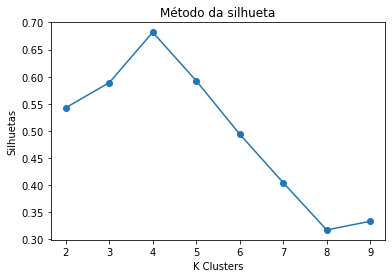

In [23]:
plt.plot(range(2,10), lista_silhuetas, marker = "o")
plt.title("Método da silhueta")
plt.xlabel("K Clusters")
plt.ylabel("Silhuetas")

# Agora, vamos atacar um problema real

In [24]:
dt = pd.read_csv("E_commerce_Data.csv")
dt.shape

(541909, 8)

In [25]:
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
dt.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
dt_limpo1 = dt[dt["CustomerID"].notnull()]
dt_limpo1.shape

(406829, 8)

In [28]:
dt_limpo1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [29]:
dt_limpo1.groupby(["CustomerID"], as_index = False)[["Quantity", "UnitPrice"]].mean()

,CustomerID,Quantity,UnitPrice
0,12346.0,0.000000,1.040000
1,12347.0,13.505495,2.644011
2,12348.0,75.516129,5.764839
3,12349.0,8.643836,8.289041
4,12350.0,11.588235,3.841176
...,...,...,...
4367,18280.0,4.500000,4.765000
4368,18281.0,7.714286,5.622857
4369,18282.0,7.538462,4.821538
4370,18283.0,1.847884,1.614987


In [30]:
dt_limpo1.query("CustomerID == 12346")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom


In [31]:
clientes_esquisitos = dt_limpo1.query("Quantity <= 0")["CustomerID"].unique()

In [32]:
dt_limpo2 = dt_limpo1[~dt_limpo1["CustomerID"].isin(clientes_esquisitos)]
dt_limpo2.shape

(153037, 8)

In [33]:
dt_limpo2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,12/1/2010 9:45,0.85,16098.0,United Kingdom
143,536382,21912,VINTAGE SNAKES & LADDERS,8,12/1/2010 9:45,3.75,16098.0,United Kingdom
144,536382,21832,CHOCOLATE CALCULATOR,12,12/1/2010 9:45,1.65,16098.0,United Kingdom
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:45,1.95,16098.0,United Kingdom


In [34]:
dt_cluster = dt_limpo2.groupby("CustomerID", as_index= False)[["UnitPrice", "Quantity"]].mean()
dt_cluster.head()

,CustomerID,UnitPrice,Quantity
0,12347.0,2.644011,13.505495
1,12348.0,5.764839,75.516129
2,12349.0,8.289041,8.643836
3,12350.0,3.841176,11.588235
4,12353.0,6.075000,5.000000


In [35]:
# Lembre-se de passar algum Scaler nas variáveis
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

In [36]:
dt_cluster[["unit_price_n", "quantity_n"]] = scaler.fit_transform(dt_cluster[["UnitPrice", "Quantity"]])

In [37]:
dt_cluster.head()

,CustomerID,UnitPrice,Quantity,unit_price_n,quantity_n
0,12347.0,2.644011,13.505495,-0.041939,-0.049409
1,12348.0,5.764839,75.516129,0.037740,0.183688
2,12349.0,8.289041,8.643836,0.102186,-0.067684
3,12350.0,3.841176,11.588235,-0.011374,-0.056616
4,12353.0,6.075000,5.000000,0.045659,-0.081381


In [38]:
X_cols = ["unit_price_n", "quantity_n"]

In [39]:
lista_inercia = []
lista_silhueta = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dt_cluster[X_cols])
    inercia = kmeans.inertia_
    labels = kmeans.labels_
    silhueta = silhouette_score(dt_cluster[X_cols], labels)
    lista_inercia.append(inercia)
    lista_silhueta.append(silhueta)

Text(0, 0.5, 'Inercia (WCSS)')

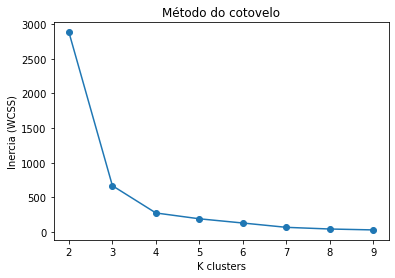

In [40]:
plt.plot(range(2,10), lista_inercia, marker = "o")
plt.title("Método do cotovelo")
plt.xlabel("K clusters")
plt.ylabel("Inercia (WCSS)")

Text(0, 0.5, 'silhueta')

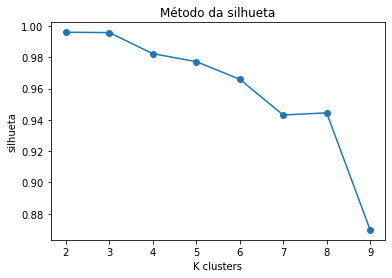

In [41]:
plt.plot(range(2,10), lista_silhueta, marker = "o")
plt.title("Método da silhueta")
plt.xlabel("K clusters")
plt.ylabel("silhueta")

In [42]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dt_cluster[X_cols])
dt_cluster["labels"] = kmeans.labels_

In [43]:
dt_cluster["labels"].value_counts(dropna = False)

0    2781
2       1
1       1
Name: labels, dtype: int64

<AxesSubplot:xlabel='unit_price_n', ylabel='quantity_n'>

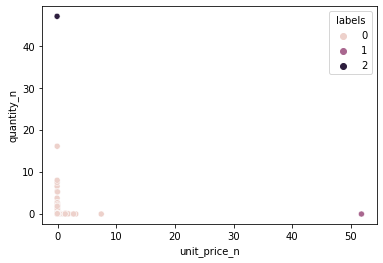

In [44]:
sns.scatterplot(x = X_cols[0], y = X_cols[1], data = dt_cluster, hue = "labels")

<AxesSubplot:xlabel='UnitPrice'>

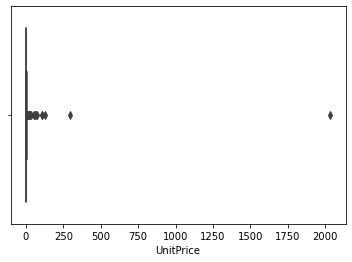

In [45]:
sns.boxplot(x = "UnitPrice", data = dt_cluster)

<AxesSubplot:xlabel='Quantity'>

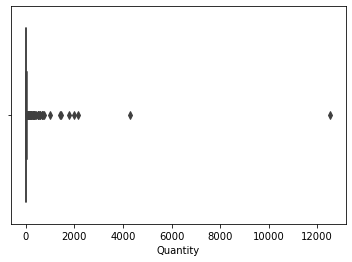

In [46]:
sns.boxplot(x = "Quantity", data = dt_cluster)

In [47]:
q4_UnitPrice = dt_cluster["UnitPrice"].quantile(0.75) * 1.5
q4_Quantity = dt_cluster["Quantity"].quantile(0.75) * 1.5

In [48]:
dt_cluster_2 = dt_cluster[(dt_cluster["UnitPrice"] < q4_UnitPrice) & (dt_cluster["Quantity"] < q4_Quantity)]
dt_cluster_2

,CustomerID,UnitPrice,Quantity,unit_price_n,quantity_n,labels
0,12347.0,2.644011,13.505495,-0.041939,-0.049409,0
3,12350.0,3.841176,11.588235,-0.011374,-0.056616,0
5,12354.0,4.503793,9.137931,0.005544,-0.065827,0
6,12355.0,4.203846,18.461538,-0.002114,-0.030779,0
8,12357.0,3.348626,20.671756,-0.023949,-0.022471,0
...,...,...,...,...,...,...
2776,18265.0,5.246522,6.760870,0.024506,-0.074762,0
2778,18278.0,3.283333,7.333333,-0.025616,-0.072610,0
2779,18280.0,4.765000,4.500000,0.012213,-0.083260,0
2780,18281.0,5.622857,7.714286,0.034115,-0.071178,0


In [49]:
# cuidado, alteamos os valores máximos dos dados, então RE-normalizamos
dt_cluster_2[["unit_price_n", "quantity_n"]] = scaler.fit_transform(dt_cluster_2[["UnitPrice", "Quantity"]])

<ipython-input-49-fbae2eb14d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_cluster_2[["unit_price_n", "quantity_n"]] = scaler.fit_transform(dt_cluster_2[["UnitPrice", "Quantity"]])
C:\Users\joao\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [50]:
# ignore a coluna de labels
dt_cluster_2.head()

,CustomerID,UnitPrice,Quantity,unit_price_n,quantity_n,labels
0,12347.0,2.644011,13.505495,-0.287975,0.994950,0
3,12350.0,3.841176,11.588235,0.877929,0.594120,0
5,12354.0,4.503793,9.137931,1.523242,0.081850,0
6,12355.0,4.203846,18.461538,1.231128,2.031080,0
8,12357.0,3.348626,20.671756,0.398241,2.493157,0


In [51]:
lista_inercia = []
lista_silhueta = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dt_cluster_2[X_cols])
    inercia = kmeans.inertia_
    labels = kmeans.labels_
    silhueta = silhouette_score(dt_cluster_2[X_cols], labels)
    lista_inercia.append(inercia)
    lista_silhueta.append(silhueta)

Text(0, 0.5, 'inercia')

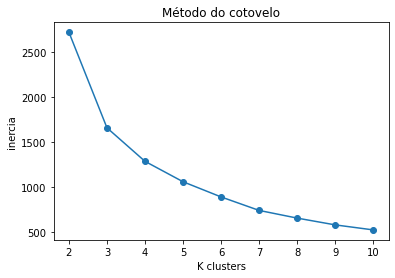

In [52]:
plt.plot(range(2,11), lista_inercia, marker = "o")
plt.title("Método do cotovelo")
plt.xlabel("K clusters")
plt.ylabel("inercia")

Text(0, 0.5, 'silhuetas')

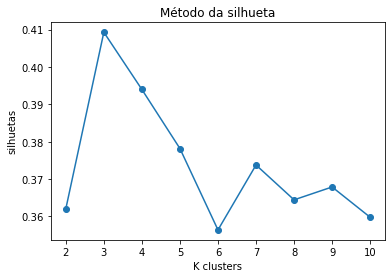

In [53]:
plt.plot(range(2,11), lista_silhueta, marker = "o")
plt.title("Método da silhueta")
plt.xlabel("K clusters")
plt.ylabel("silhuetas")

In [54]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dt_cluster_2[X_cols])
dt_cluster_2["labels"] = kmeans.labels_

<ipython-input-54-564f091ca91b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_cluster_2["labels"] = kmeans.labels_


In [55]:
dt_cluster_2["labels"].value_counts(dropna = False, normalize = True)

1    0.365514
0    0.355186
2    0.279300
Name: labels, dtype: float64

In [65]:
sns.scatterplot(x = "Quantity", y = "UnitPrice", data = dt_cluster_2, hue = "labels", palette = "tab10", figsize(10,10);

SyntaxError: positional argument follows keyword argument (<ipython-input-65-8ea52c77bfba>, line 1)

In [57]:
dt_limpo2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,12/1/2010 9:45,0.85,16098.0,United Kingdom
143,536382,21912,VINTAGE SNAKES & LADDERS,8,12/1/2010 9:45,3.75,16098.0,United Kingdom
144,536382,21832,CHOCOLATE CALCULATOR,12,12/1/2010 9:45,1.65,16098.0,United Kingdom
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:45,1.95,16098.0,United Kingdom


In [58]:
dt_limpo2.shape

(153037, 8)

In [59]:
dt_cluster_2.shape

(2227, 6)

In [60]:
dt_analise = pd.merge(dt_limpo2, dt_cluster_2[["CustomerID", "labels"]], on =[ "CustomerID"], how = "left")
dt_analise.shape

(153037, 9)

In [61]:
dt_analise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,labels
0,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,2.0
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,12/1/2010 9:45,0.85,16098.0,United Kingdom,2.0
2,536382,21912,VINTAGE SNAKES & LADDERS,8,12/1/2010 9:45,3.75,16098.0,United Kingdom,2.0
3,536382,21832,CHOCOLATE CALCULATOR,12,12/1/2010 9:45,1.65,16098.0,United Kingdom,2.0
4,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:45,1.95,16098.0,United Kingdom,2.0


In [62]:
dt_analise_2 = dt_analise[dt_analise.labels.notnull()]
dt_analise_2.shape

(141822, 9)

In [63]:
dt_analise_2.groupby(["labels"], as_index = False)[["Quantity","UnitPrice"]].describe()

Quantity                                                    UnitPrice  \
     count       mean        std  min  25%   50%   75%    max     count   
0  35798.0  13.223616  15.300680  1.0  6.0  12.0  12.0  906.0   35798.0   
1  81249.0   3.974277   6.490846  1.0  1.0   2.0   4.0  480.0   81249.0   
2  24775.0   8.195681   9.640426  1.0  2.0   6.0  12.0  288.0   24775.0   

                                                     
       mean       std  min   25%   50%   75%    max  
0  2.339882  2.552512  0.0  0.85  1.65  2.95   40.0  
1  2.480946  2.465619  0.0  0.95  1.65  2.95  125.0  
2  4.085812  5.604077  0.0  1.45  2.95  4.95  295.0

# Exercício

Aplique KMeans no Iris dataset e realize os plots dos resultados para k clusters, com k de 1 a 8.

- 1) Importe o dataset iris: 

``` 
from sklearn.datasets import load_iris
data = load_iris(as_frame = True)
X = data["data"]
y = data["target"] # <- mas lembre-se que esse é inutil
```
- 2) Lembre-se que é necessário aplicar algum Scaler nos dados para realizar clusterização;
- 3) Delimite o range de clusters para aplicar;
- 4) Avalie as métricas para cada cluster;
- 5) Escolha 2 variáveis e observe a coloração para valor de cluster;}